# Linear Regression - RC Analysis



## Imports
** Import pandas, numpy, matplotlib,and seaborn, sklearn. Then set %matplotlib inline **

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [96]:
ECustomers  = pd.read_csv('WHY_RC.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [97]:
ECustomers.head()

,YYYYMM,total_Doctor,total_Patient,total_Visit,total_Drug,total_treatment,total_lx,total_Promotion,total_Amt
0,201501,79,35474,56490,128018,24510,13715,34,75543857
1,201502,81,33293,52315,122257,24310,12596,49,72393830
2,201503,81,36407,59151,138916,25953,14468,87,83658838
3,201504,82,34281,54665,123385,26943,13402,119,75584831
4,201505,82,35765,58660,130046,31973,15400,53,84461453


In [98]:
ECustomers.describe()

,YYYYMM,total_Doctor,total_Patient,total_Visit,total_Drug,total_treatment,total_lx,total_Promotion,total_Amt
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01
mean,201603.485714,81.257143,30539.514286,48285.342857,108656.857143,22337.571429,13594.085714,55.742857,7.410047e+07
std,82.065387,1.244821,3004.854106,5163.813171,13924.752071,3337.271325,768.359956,19.016004,6.585469e+06
min,201501.000000,79.000000,26081.000000,40713.000000,87185.000000,18159.000000,12390.000000,25.000000,6.100000e+07
25%,201509.500000,80.000000,27748.500000,44112.500000,96597.000000,19800.000000,13102.500000,43.000000,6.898695e+07
50%,201606.000000,81.000000,30278.000000,47335.000000,108087.000000,21584.000000,13526.000000,53.000000,7.323550e+07
75%,201702.500000,82.000000,33298.500000,52531.000000,121214.000000,24313.500000,14058.500000,61.000000,7.819160e+07
max,201711.000000,84.000000,36407.000000,59151.000000,138916.000000,31973.000000,15429.000000,119.000000,8.663297e+07


In [99]:
ECustomers.columns

Index(['YYYYMM', 'total_Doctor', 'total_Patient', 'total_Visit', 'total_Drug',
       'total_treatment', 'total_lx', 'total_Promotion', 'total_Amt'],
      dtype='object')

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

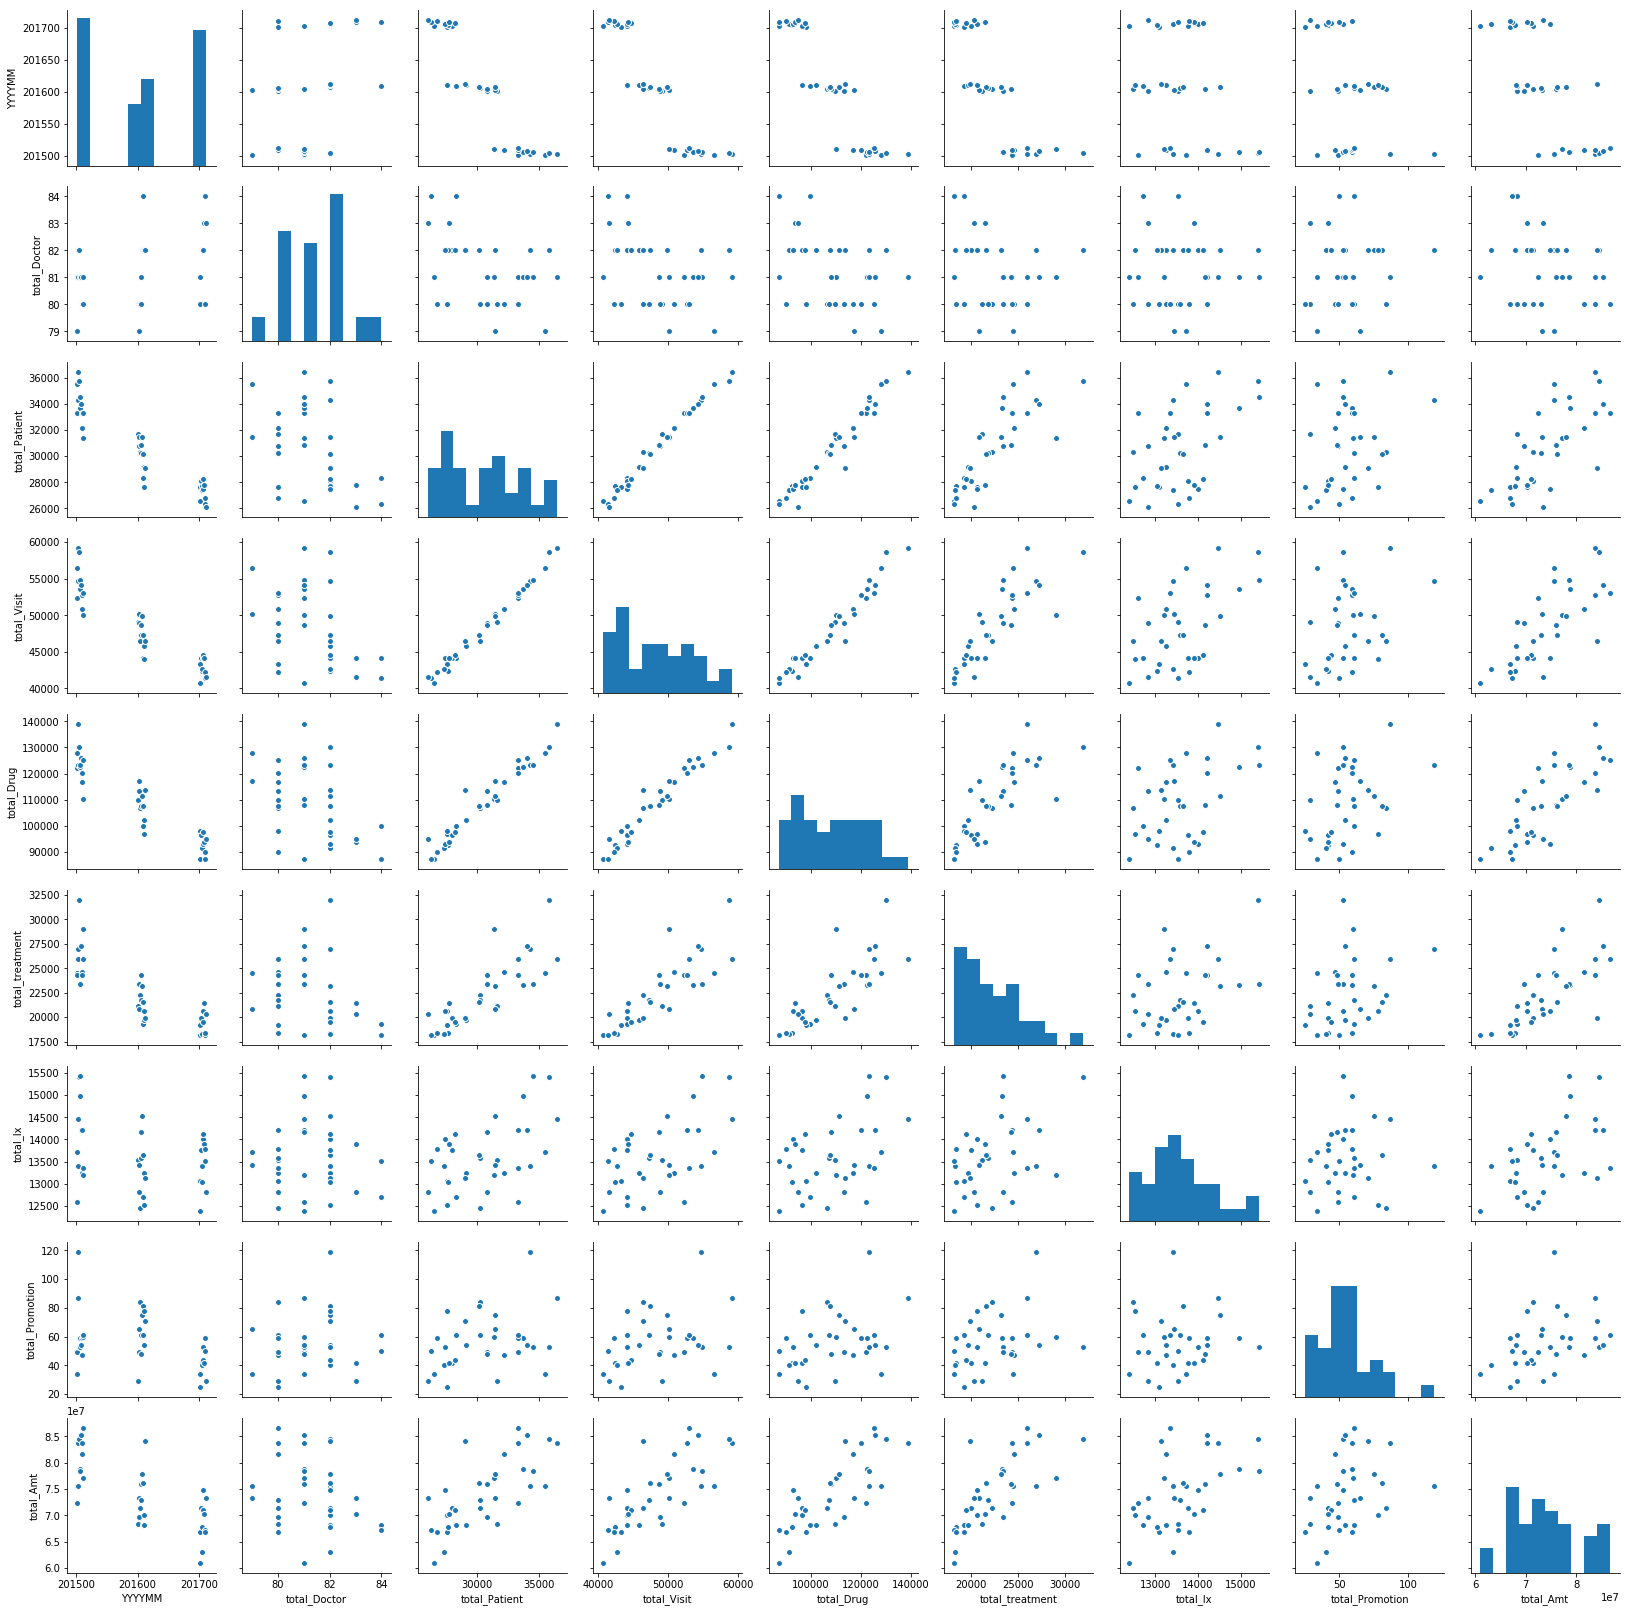

In [100]:
sns.pairplot(ECustomers)

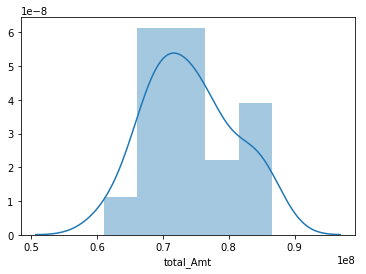

In [101]:
sns.distplot(ECustomers['total_Amt'])

** Do the same but with the Time on App column instead. **

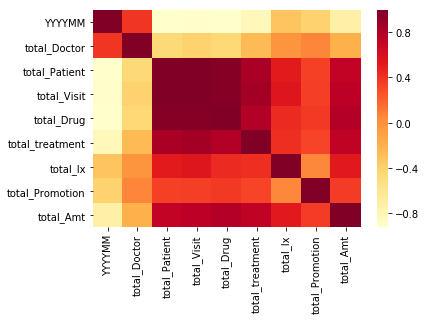

In [104]:
sns.heatmap(ECustomers.corr() , cmap= 'YlOrRd' )

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [105]:
X =ECustomers[['total_Patient', 'total_Visit', 'total_Drug',  'total_treatment', 'total_lx']] 
Y =ECustomers[ 'total_Amt']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [108]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [109]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [110]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [111]:
print(lm.intercept_)

23515806.3093


In [112]:
print(lm.coef_)

[-3001.21715405 -1361.44171984  1171.76903743  1192.89629564  3971.8226258 ]


In [113]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
total_Patient,-3001.217154
total_Visit,-1361.441720
total_Drug,1171.769037
total_treatment,1192.896296
total_lx,3971.822626


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [114]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

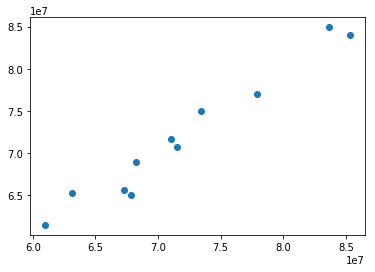

In [115]:
plt.scatter(y_test,predictions)

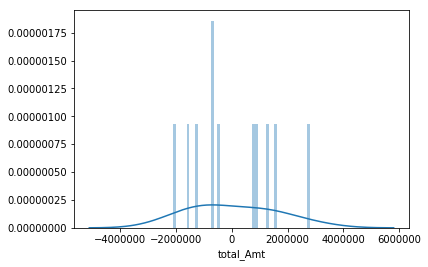

In [116]:
sns.distplot((y_test-predictions),bins=50);

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [117]:
from sklearn import metrics

In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))






MAE: 1292442.62993
MSE: 2.11411450055e+12
RMSE: 1453999.48437


## Residuals
**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [119]:
from sklearn.metrics import r2_score

In [120]:
r2_score(y_test, predictions)

0.9615380441736584